<a href="https://colab.research.google.com/github/jigarsanghavi/Intel_image_classification/blob/master/Intel_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [5]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
    q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
# print(kaggle_api_key)
filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d puneet6060/intel-image-classification

100% 345M/346M [00:02<00:00, 186MB/s]
100% 346M/346M [00:02<00:00, 160MB/s]


In [0]:
!unzip /content/intel-image-classification.zip

In [0]:
import tensorflow as tf
import os
from os import listdir
import numpy as np
import pandas as pd
import cv2
from fastai.vision import *
import matplotlib.pyplot as plt                        
%matplotlib inline

In [12]:
print(os.listdir('/content/data/train_dataset'))

['street', 'forest', 'sea', 'buildings', 'glacier', 'mountain']


In [0]:
classes = [os.listdir('/content/data/train_dataset')]

In [14]:
classes

[['street', 'forest', 'sea', 'buildings', 'glacier', 'mountain']]

In [0]:
import warnings
warnings.filterwarnings('ignore')


In [0]:
data = ImageDataBunch.from_folder('data', train="train_dataset",valid='valid_dataset',
        ds_tfms=get_transforms(),size=150,bs=64, num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [18]:
print(len(data.train_ds),len(data.valid_ds))

14034 3000


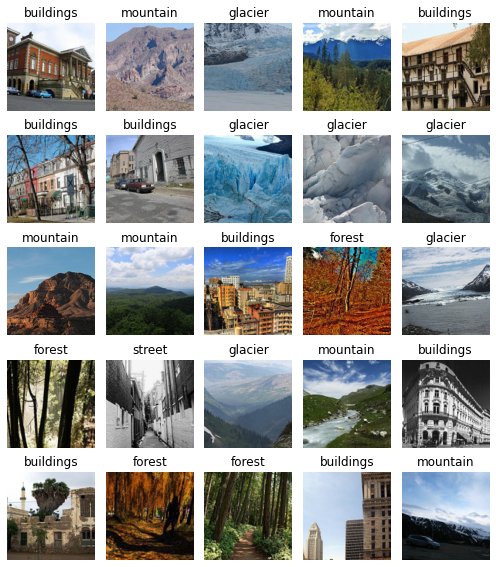

In [19]:
data.show_batch(rows=5, figsize=(7,8))

In [20]:
precision=Precision()
recall=Recall()
AUC=AUROC()
learn = cnn_learner(data, models.resnet50, metrics=(accuracy,precision,recall,AUC),callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,0.493772,0.373505,0.886000,0.888803,0.890031,0.262121,01:03
1,0.398375,0.295337,0.902000,0.905079,0.903132,0.201448,01:03
2,0.305323,0.251147,0.909333,0.911400,0.911252,0.120679,01:02
3,0.273102,0.228247,0.919667,0.921515,0.921676,0.216832,01:03
4,0.240322,0.222457,0.921333,0.923826,0.922679,0.196252,01:03
5,0.213115,0.211234,0.925000,0.925490,0.927095,0.182683,01:04
6,0.179903,0.206153,0.928667,0.930828,0.930320,0.261203,01:03
7,0.157184,0.192633,0.936667,0.937681,0.938746,0.205208,01:03
8,0.141492,0.186455,0.935667,0.937304,0.937607,0.229672,01:03
9,0.137625,0.199310,0.934000,0.935578,0.936146,0.205589,01:03


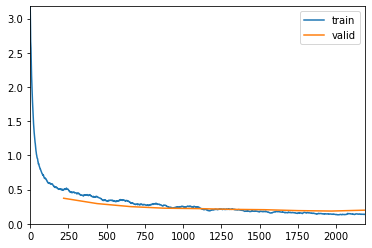

In [21]:
learn.fit_one_cycle(10)

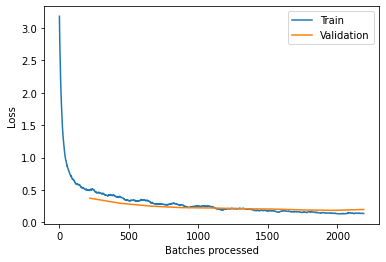

In [22]:
learn.recorder.plot_losses()

In [0]:
learn.save("intel_image_classifier")

In [0]:
learn.export("intel_image_classifier.pkl")

In [31]:
precision=Precision()
recall=Recall()
AUC=AUROC()
learn1 = cnn_learner(data, models.vgg16_bn, metrics=(accuracy,precision,recall,AUC),callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth


epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,0.550406,0.341542,0.890667,0.892634,0.893378,0.408991,01:06
1,0.417158,0.289388,0.898333,0.900832,0.902034,0.266007,01:04
2,0.348964,0.275154,0.902000,0.905195,0.905295,0.260077,01:04
3,0.294342,0.251454,0.914000,0.915219,0.915961,0.334868,01:04
4,0.273785,0.245197,0.918667,0.919686,0.920589,0.196975,01:04
5,0.242198,0.235549,0.919667,0.922691,0.921628,0.200629,01:05
6,0.228045,0.214730,0.923667,0.924740,0.925514,0.196161,01:04
7,0.208857,0.214676,0.925333,0.925985,0.927606,0.235316,01:04
8,0.175048,0.202363,0.927333,0.928322,0.929134,0.198213,01:04
9,0.189414,0.201338,0.926333,0.927409,0.928036,0.245436,01:04


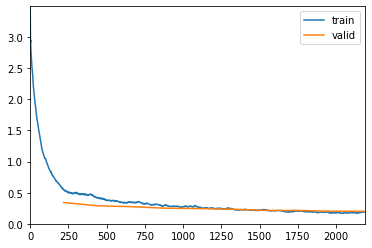

In [32]:
learn1.fit_one_cycle(10)

In [0]:
def image_classifier(path):
  img = cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)
  dim = (150,150)
  img = cv2.resize(img,dim)
  plt.imshow(img)
  image = open_image(path)
  prediction = learn.predict(image)
  pred_class=str(prediction[0])
  print("The category is:",pred_class)

The category is: buildings


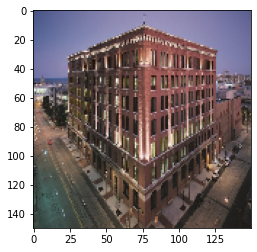

In [60]:
image_classifier('test1.jpg')

The category is: sea


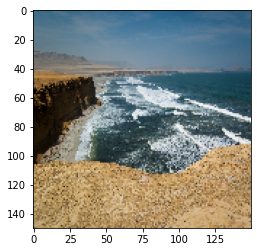

In [61]:
image_classifier('test2.jpg')

The category is: mountain


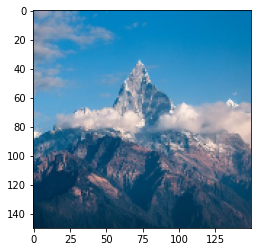

In [62]:
image_classifier('test3.jpeg')